
Fold accuracy: 1.0
Fold accuracy: 0.9666666388511658
Fold accuracy: 0.7666666507720947
Fold accuracy: 0.800000011920929
Mean accuracy: 0.8833333253860474


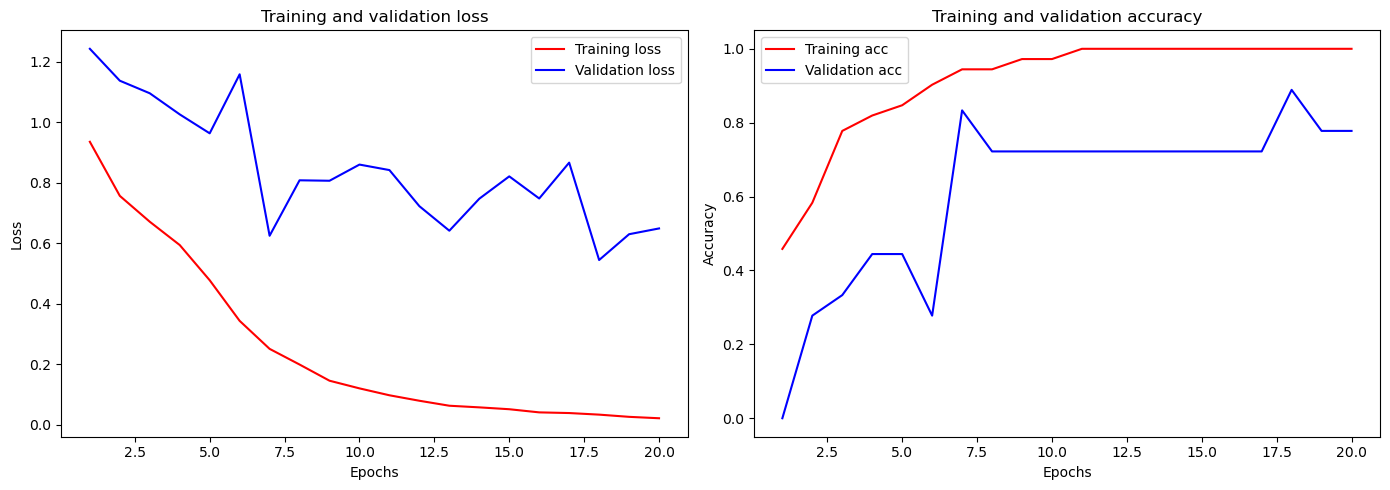

In [2]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

accuracies = []
histories = []

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

for train_index, test_index in kf.split(features):
    # Split the data into train and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit and transform the training labels
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
    
    # Transform the testing labels
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    val_epochs = 20
    history = model.fit(X_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f"Fold accuracy: {test_accuracy}")
    
    accuracies.append(test_accuracy)
    histories.append(history.history)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

# Optional: Plotting training and validation accuracy for the last fold
history_dict = histories[-1]
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, val_epochs + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Fold accuracy: 1.0
Fold accuracy: 0.8500000238418579
Fold accuracy: 1.0
Fold accuracy: 0.75
Fold accuracy: 0.949999988079071
Fold accuracy: 0.75
Mean accuracy: 0.8833333353201548


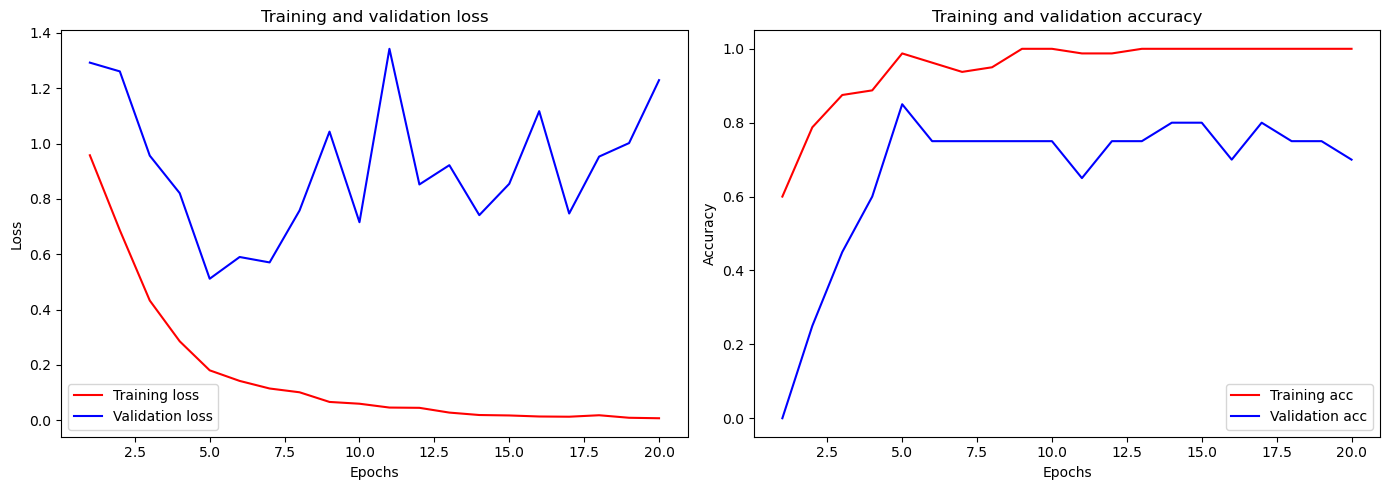

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)

accuracies = []
histories = []

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

for train_index, test_index in kf.split(features):
    # Split the data into train and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit and transform the training labels
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
    
    # Transform the testing labels
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    val_epochs = 20
    history = model.fit(X_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f"Fold accuracy: {test_accuracy}")
    
    accuracies.append(test_accuracy)
    histories.append(history.history)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

# Optional: Plotting training and validation accuracy for the last fold
history_dict = histories[-1]
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, val_epochs + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Fold accuracy: 1.0
Fold accuracy: 1.0
Fold accuracy: 0.8666666746139526
Fold accuracy: 0.7333333492279053
Mean accuracy: 0.9000000059604645


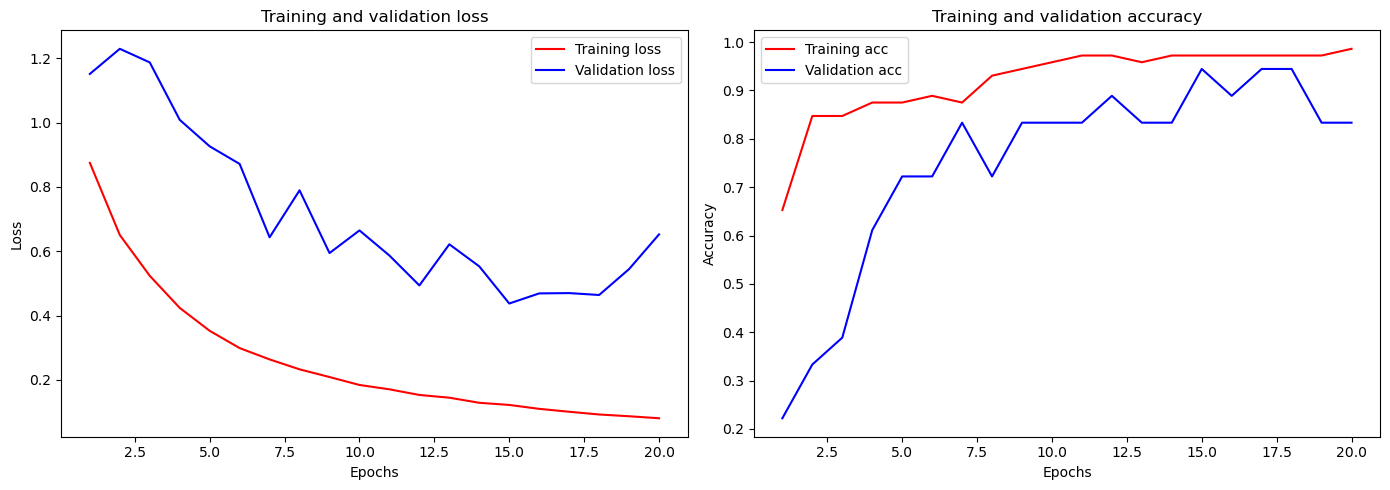

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

accuracies = []
histories = []

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

for train_index, test_index in kf.split(features):
    # Split the data into train and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit and transform the training labels
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
    
    # Transform the testing labels
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    val_epochs = 20
    history = model.fit(X_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f"Fold accuracy: {test_accuracy}")
    
    accuracies.append(test_accuracy)
    histories.append(history.history)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

# Optional: Plotting training and validation accuracy for the last fold
history_dict = histories[-1]
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, val_epochs + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Fold accuracy: 1.0
Fold accuracy: 0.8500000238418579
Fold accuracy: 0.949999988079071
Fold accuracy: 0.800000011920929
Fold accuracy: 0.8500000238418579
Fold accuracy: 0.699999988079071
Mean accuracy: 0.8583333392937978


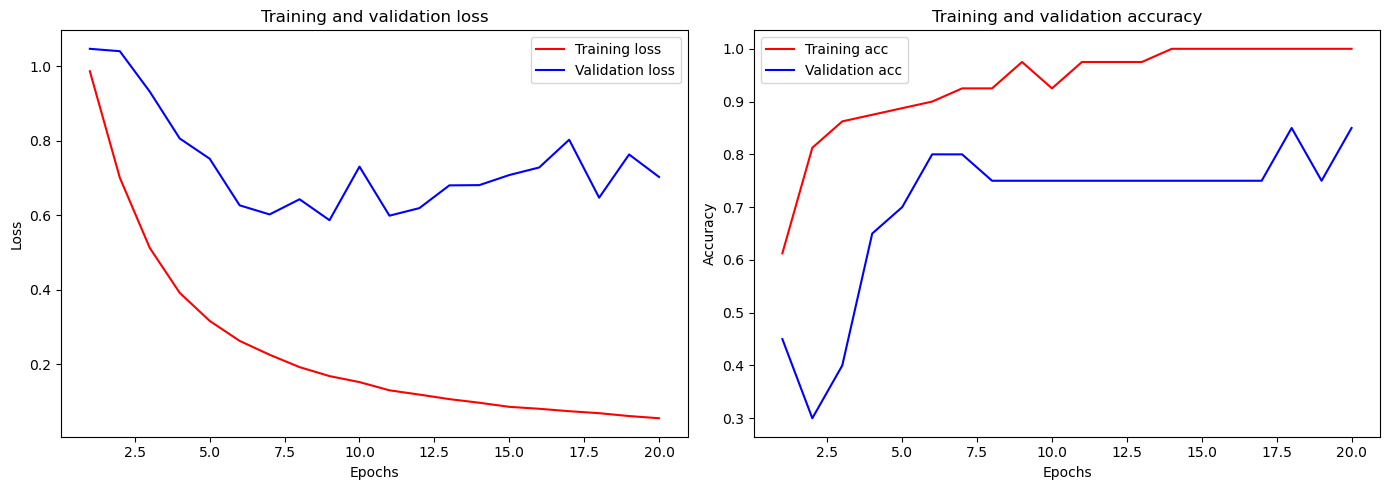

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)

accuracies = []
histories = []

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

for train_index, test_index in kf.split(features):
    # Split the data into train and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit and transform the training labels
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
    
    # Transform the testing labels
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    val_epochs = 20
    history = model.fit(X_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f"Fold accuracy: {test_accuracy}")
    
    accuracies.append(test_accuracy)
    histories.append(history.history)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

# Optional: Plotting training and validation accuracy for the last fold
history_dict = histories[-1]
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, val_epochs + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Fold accuracy: 1.0
Fold accuracy: 1.0
Fold accuracy: 0.8333333134651184
Fold accuracy: 0.9166666865348816
Fold accuracy: 0.9166666865348816
Fold accuracy: 1.0
Fold accuracy: 0.75
Fold accuracy: 0.9166666865348816
Fold accuracy: 0.9166666865348816
Fold accuracy: 0.5833333134651184
Mean accuracy: 0.8833333373069763


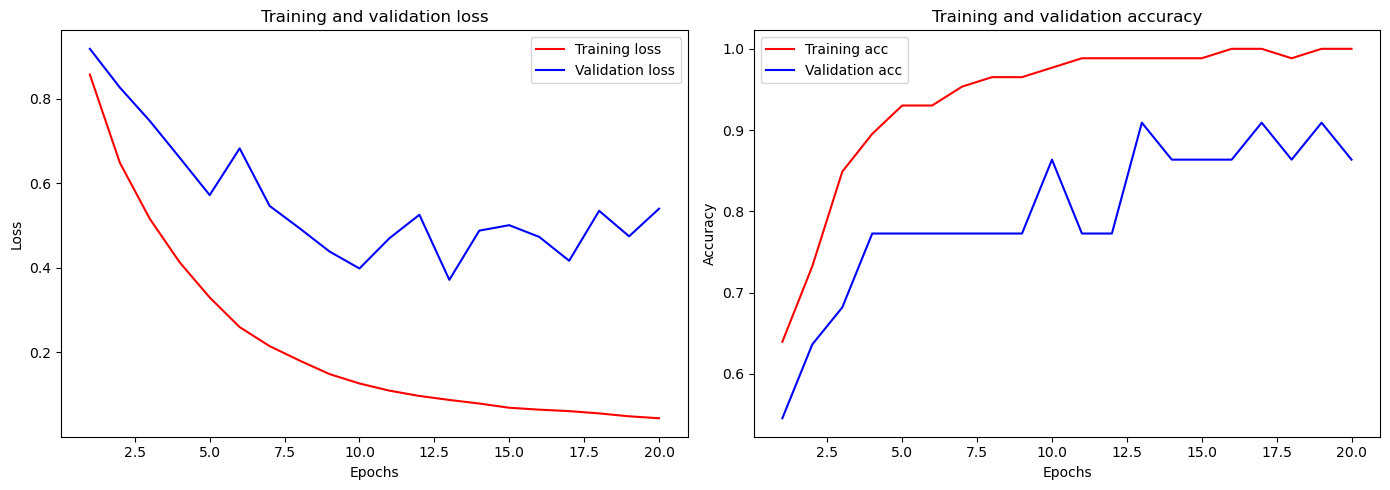

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
histories = []

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

for train_index, test_index in kf.split(features):
    # Split the data into train and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit and transform the training labels
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
    
    # Transform the testing labels
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    val_epochs = 20
    history = model.fit(X_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f"Fold accuracy: {test_accuracy}")
    
    accuracies.append(test_accuracy)
    histories.append(history.history)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

# Optional: Plotting training and validation accuracy for the last fold
history_dict = histories[-1]
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, val_epochs + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
histories = []

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

for train_index, test_index in kf.split(features):
    # Split the data into train and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit and transform the training labels
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
    
    # Transform the testing labels
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    val_epochs = 20
    history = model.fit(X_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f"Fold accuracy: {test_accuracy}")
    
    accuracies.append(test_accuracy)
    histories.append(history.history)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Fold accuracy: 1.0
Fold accuracy: 1.0
Fold accuracy: 0.8333333134651184
Fold accuracy: 0.9166666865348816
Fold accuracy: 1.0
Fold accuracy: 1.0
Fold accuracy: 0.8333333134651184
Fold accuracy: 0.9166666865348816
Fold accuracy: 1.0
Fold accuracy: 0.5833333134651184
Mean accuracy: 0.9083333313465118
